In [1]:
import os
import re
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# F-score Resulst

In [2]:
dataset_ls=['summe','tvsum']
split_id_ls=[0,1,2,3,4]
epoch=60

result_folder='./log/our_results'+'/{dataset}-split{split_id}-e{epoch}/'
result_file='log_train.txt'

In [3]:
result_record=[]
for dataset in dataset_ls:
    

    result_ls=[]
    
    for split_id in split_id_ls:
    
        result_pth=os.path.join(result_folder.format(dataset=dataset,split_id=split_id,epoch=epoch),result_file)
        
        with open(result_pth, 'r') as file:
            
            content = file.read()
            
        # Find the line containing "Average F-score"
        avg_fscore_line = [line for line in content.splitlines() if "Average F1-score" in line or "Average F-score" in line]
        
        if avg_fscore_line:
            # Extract the value after "Average F-score"
            avg_fscore = avg_fscore_line[0].split()[-1].replace('%', '')
            print(float(avg_fscore))
        result_ls.append(float(avg_fscore))
        result_record.append([dataset, split_id,avg_fscore])
    average_result=sum(result_ls) / len(result_ls)
    print(f'{dataset} result: {average_result}')
    # print(f'{average_result}')
result_df=pd.DataFrame(result_record, columns=["dataset","split_id","fscore"])   

48.5
49.5
45.4
54.1
50.8
summe result: 49.660000000000004
61.5
59.2
59.0
61.4
65.5
tvsum result: 61.32000000000001


# Generated Summary and Importantce Score

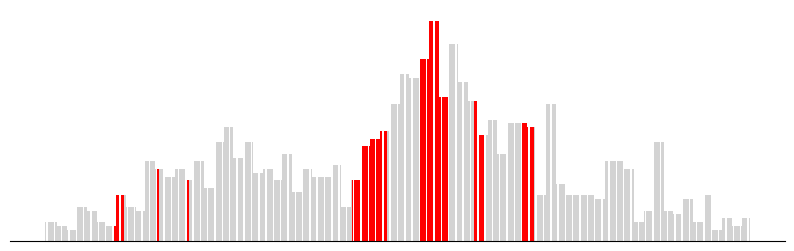

In [4]:
path='./log/our_results/tvsum-split4-e60/result_ep60_split_4_gru.h5'

h5_res = h5py.File(path, 'r')
keys = h5_res.keys()
key= 'video_15'

gt_score = h5_res[key]['gt_frame_score'][...]
generated_summary = h5_res[key]['machine_summary'][...]

x = np.arange(len(gt_score))


fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(x, gt_score, color='lightgray')
ax.bar(x, gt_score * generated_summary, color='red', label='Our Method')

ax.set_xticks([]) 
ax.set_yticks([])  

for spine in ['top', 'right', 'left',]:
    ax.spines[spine].set_visible(False)

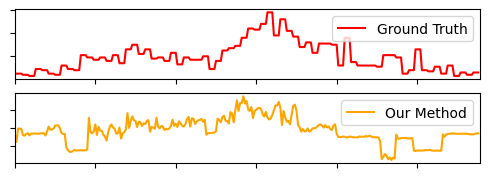

In [5]:
path='./log/our_results/tvsum-split4-e60/result_ep60_split_4_gru.h5'


h5_res = h5py.File(path, 'r')
key= 'video_15'

our_score = h5_res[key]['score'][...]

machine_summary = h5_res[key]['machine_summary'][...]
gtscore = h5_res[key]['gtscore'][...]
fm = h5_res[key]['fm'][()]

# plot score vs gtscore
fig, axs = plt.subplots(2,figsize=(6, 2))
n = len(gtscore)
axs[0].plot(range(n), gtscore, color='red',label='Ground Truth')
axs[0].set_xlim(0, n)
axs[0].set_yticklabels([])
axs[0].set_xticklabels([])
axs[0].legend(loc='upper right')

axs[1].plot(range(n), our_score, color='orange',label='Our Method')
axs[1].set_xlim(0, n)
axs[1].set_yticklabels([])
axs[1].set_xticklabels([])
axs[1].legend(loc='upper right')
h5_res.close()

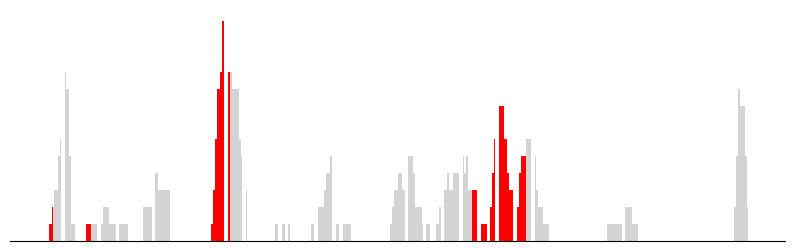

In [6]:
path='./log/our_results/summe-split0-e60/result_ep60_split_0_gru.h5'

h5_res = h5py.File(path, 'r')
keys = h5_res.keys()
key= 'video_9'

gt_score = h5_res[key]['gt_frame_score'][...]
generated_summary = h5_res[key]['machine_summary'][...]

x = np.arange(len(gt_score))


fig, ax = plt.subplots(figsize=(10, 3))
ax.bar(x, gt_score, color='lightgray')
ax.bar(x, gt_score * generated_summary, color='red', label='Our Method')

ax.set_xticks([]) 
ax.set_yticks([])  

for spine in ['top', 'right', 'left',]:
    ax.spines[spine].set_visible(False)

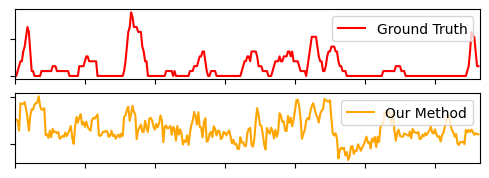

In [7]:
path='./log/our_results/summe-split0-e60/result_ep60_split_0_gru.h5'

h5_res = h5py.File(path, 'r')
key= 'video_9'

our_score = h5_res[key]['score'][...]

machine_summary = h5_res[key]['machine_summary'][...]
gtscore = h5_res[key]['gtscore'][...]
fm = h5_res[key]['fm'][()]

# plot score vs gtscore
fig, axs = plt.subplots(2,figsize=(6, 2))
n = len(gtscore)
axs[0].plot(range(n), gtscore, color='red',label='Ground Truth')
axs[0].set_xlim(0, n)
axs[0].set_yticklabels([])
axs[0].set_xticklabels([])
axs[0].legend(loc='upper right')

axs[1].plot(range(n), our_score, color='orange',label='Our Method')
axs[1].set_xlim(0, n)
axs[1].set_yticklabels([])
axs[1].set_xticklabels([])
axs[1].legend(loc='upper right')
h5_res.close()

# Reward Curve

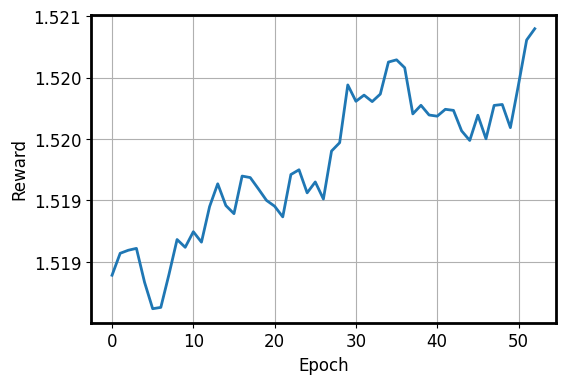

In [8]:
path='./log/our_results/summe-split1-e60/log_train.txt'

plt.rc('font' ,size=12)
all_front=24
# Rewards in RL are typically have a high variance,
# so it's better to smooth them out for better analysis
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma



regex_reward = re.compile('reward ([\.\deE+-]+)')
rewards = []

with open(path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        reward_match = regex_reward.search(line)
        if reward_match:
            reward = float(reward_match.group(1))
            rewards.append(reward)

rewards = np.array(rewards)
rewards = movingaverage(rewards, 8)

fig = plt.figure(figsize=(6, 4))
plt.plot(rewards, linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Reward')
ax = plt.gca()  
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.grid()
ax.spines['top'].set_linewidth(2) 
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

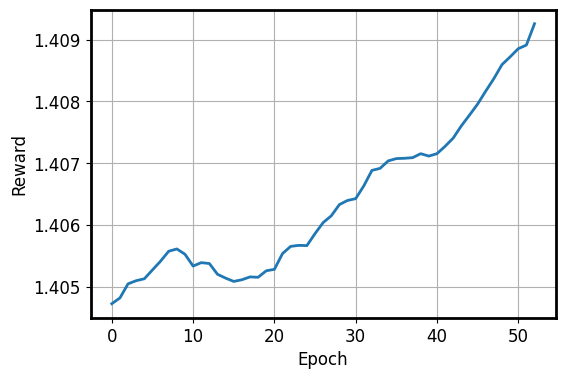

In [9]:
path='./log/our_results/tvsum-split3-e60/log_train.txt'

plt.rc('font' ,size=12)
all_front=24
# Rewards in RL are typically have a high variance,
# so it's better to smooth them out for better analysis
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma



regex_reward = re.compile('reward ([\.\deE+-]+)')
rewards = []

with open(path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        reward_match = regex_reward.search(line)
        if reward_match:
            reward = float(reward_match.group(1))
            rewards.append(reward)

rewards = np.array(rewards)
rewards = movingaverage(rewards, 8)

fig = plt.figure(figsize=(6, 4))
plt.plot(rewards, linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Reward')
ax = plt.gca()  
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.grid()
ax.spines['top'].set_linewidth(2) 
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)